In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0, 0.5, 'Frequency')

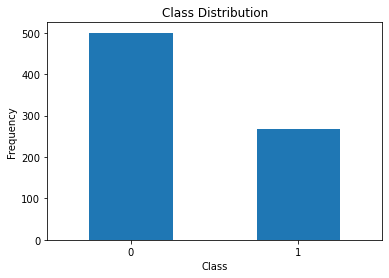

In [ ]:
count_classes = pd.value_counts(df['Outcome'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")


In [ ]:
X = df.drop('Outcome',axis = 1)
Y = df['Outcome']

In [ ]:
X.shape,Y.shape

((768, 8), (768,))

In [ ]:
## Get the Fraud and the normal dataset 

diabetic = df[df['Outcome']==1]

normal = df[df['Outcome']==0]

In [ ]:
print(diabetic.shape,normal.shape)

(268, 9) (500, 9)


In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,Y)

In [ ]:
X_res.shape,y_res.shape

((536, 8), (536,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({0: 268, 1: 268})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
nm = RandomUnderSampler()
X_res,y_res=nm.fit_sample(X,Y)
X_res.shape,y_res.shape

((536, 8), (536,))

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({0: 268, 1: 268})


In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_res,y_res=smk.fit_sample(X,Y)


In [ ]:
X_res.shape,y_res.shape

((928, 8), (928,))

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 464, 0: 464})


In [ ]:
from imblearn.combine import SMOTEENN
smk = SMOTEENN()
X_res,y_res=smk.fit_sample(X,Y)
X_res.shape,y_res.shape

((532, 8), (532,))

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 309, 0: 223})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X, Y)
X_train_res.shape,y_train_res.shape

((1000, 8), (1000,))

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 500, 0: 500})


In [ ]:
from imblearn.over_sampling import SMOTE
os =  SMOTE()
X_train_res, y_train_res = os.fit_sample(X, Y)
X_train_res.shape,y_train_res.shape

((1000, 8), (1000,))

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 500, 0: 500})


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

easy=EasyEnsembleClassifier()
easy.fit(X,Y)


EasyEnsembleClassifier()

In [ ]:
easy.score(X,Y)

0.81640625

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train,Y_train)

BalancedRandomForestClassifier()

In [ ]:
brf.score(X_train,Y_train)


0.9664804469273743

In [ ]:
brf.score(X_test,Y_test)

0.7489177489177489